   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.8/789.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for reboundx: filename=reboundx-4.4.1-cp311-cp311-linux_x86_64.whl size=291922 sha256=051b0a9a299aa583354a8ab087c71066e65956d6ad7ba43f0397157307df9672
  Stored in directory: /root/.cache/pip/wheels/26/f9/9f/bd96dfce5b20fb8465e1bfe6783829094b3140a74c230fa893
Successfully built reboundx


/usr/local/lib/python3.11/dist-packages/rebound/simulation.py:192: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


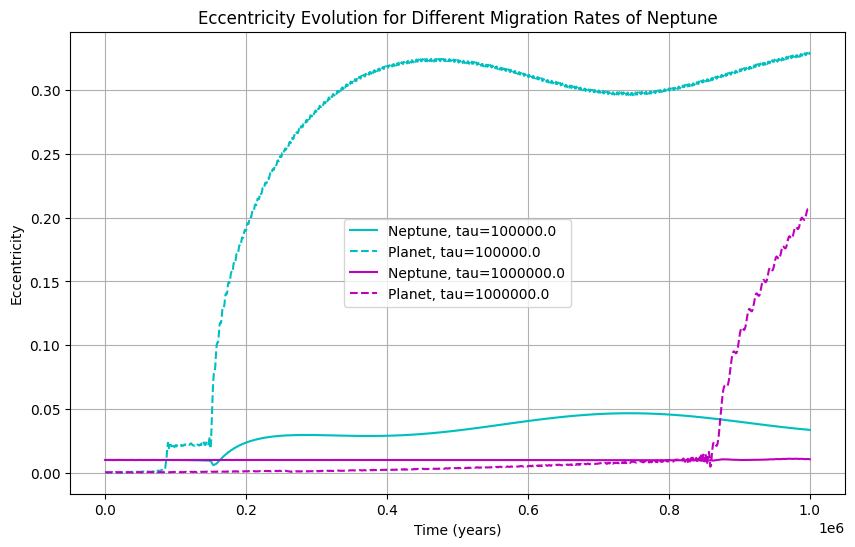

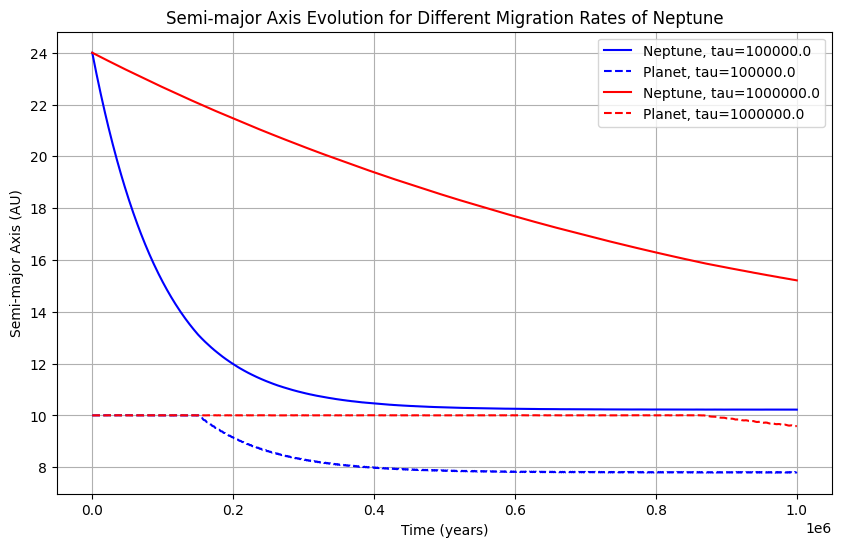

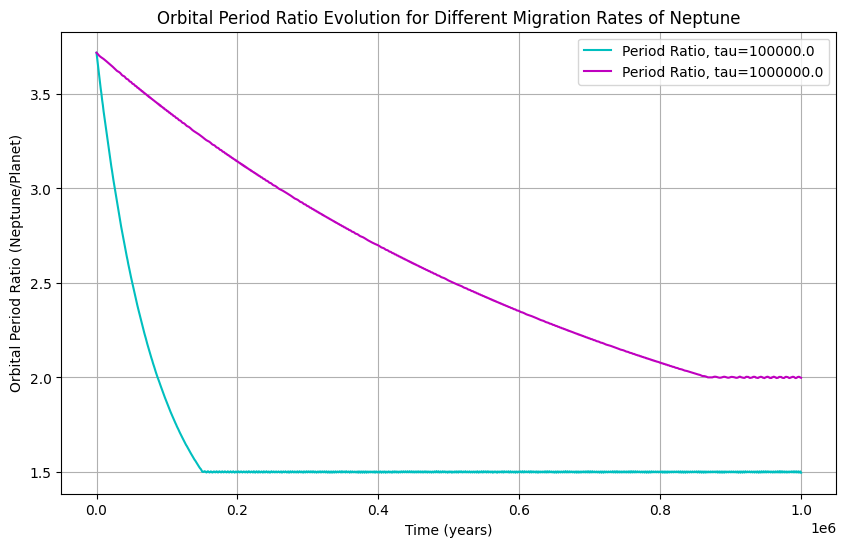

In [2]:
# Code to run simulation on resonant capture (on Google Colab, Run-time = 6 ~ 7 minutes ) :

import sys
!pip install rebound
!pip install reboundx
import rebound
import reboundx
import numpy as np
import matplotlib.pyplot as plt

# Here, the simulation is initialized
sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun')

# Adding reference star (Sun), Neptune, and the inner planet with parameters as given in the exercise :
sim.add(m=1)  # Sun
sim.add(m=5.1e-5, a=24., e=0.01, hash="neptune")  # Neptune at a = 24 AU (pre-migration)
sim.add(m=3e-6, a=10., e=0.0, hash="planet")  # Inner planet (Earth-like mass) at a = 10 AU

# Movement to center of mass frame
sim.move_to_com()

# Code for adding the exponential migration force, as given in the Github example and lab manual
rebx = reboundx.Extras(sim) # Initiating reboundx
mod_effect = rebx.load_force("exponential_migration")
rebx.add_force(mod_effect)

# The following are the migration parameters :
mig_rates = [1e5, 1e6]  # Different e-folding times, hence two varying migration rates
colors1 = ['c', 'm']
colors2 = ['b', 'r']

# Plot for eccentricity evolution

plt.figure(figsize=(10, 6))
for i, tau in enumerate(mig_rates):
    sim_copy = sim.copy()
    rebx_copy = reboundx.Extras(sim_copy)  # I created a new Extras instance for the copy
    mod_effect_copy = rebx_copy.load_force("exponential_migration")
    rebx_copy.add_force(mod_effect_copy)
    sim_copy.particles['neptune'].params["em_aini"] = 24.0
    sim_copy.particles['neptune'].params["em_afin"] = 10.0
    sim_copy.particles['neptune'].params["em_tau_a"] = tau

    # Integration setup
    sim_copy.integrator = "ias15"
    time_end = 1e6  # Integrating the system for 1 million years
    N_out = 1000  # Number of output points
    times = np.linspace(0, time_end, N_out)
    e_neptune = []
    e_planet = []

    # Here lies the code to run my simulation and record eccentricity values
    for t in times:
        sim_copy.integrate(t)
        e_neptune.append(sim_copy.particles['neptune'].e)
        e_planet.append(sim_copy.particles['planet'].e)

    # Plot of results for comparison
    plt.plot(times, e_neptune, label=f'Neptune, tau={tau}', color=colors1[i], linestyle='-')
    plt.plot(times, e_planet, label=f'Planet, tau={tau}', color=colors1[i], linestyle='--')

plt.xlabel('Time (years)')
plt.ylabel('Eccentricity')
plt.legend()
plt.title('Eccentricity Evolution for Different Migration Rates of Neptune')
plt.grid(True)
plt.show()

# Plot for semi-major axis evolution

plt.figure(figsize=(10, 6))
for i, tau in enumerate(mig_rates):
    sim_copy = sim.copy()
    rebx_copy = reboundx.Extras(sim_copy)  # I Created a new Extras instance for the copy
    mod_effect_copy = rebx_copy.load_force("exponential_migration")
    rebx_copy.add_force(mod_effect_copy)
    sim_copy.particles['neptune'].params["em_aini"] = 24.0
    sim_copy.particles['neptune'].params["em_afin"] = 10.0
    sim_copy.particles['neptune'].params["em_tau_a"] = tau

    # Integration setup
    sim_copy.integrator = "ias15"
    time_end = 1e6  # Integrating the system for 1 million years
    N_out = 1000  # Number of output points
    times = np.linspace(0, time_end, N_out)
    a_neptune = []
    a_planet = []

    # Code to run simulation and record semimajor axis values :
    for t in times:
        sim_copy.integrate(t)
        a_neptune.append(sim_copy.particles['neptune'].a)
        a_planet.append(sim_copy.particles['planet'].a)

    # Plot of results for comparison
    plt.plot(times, a_neptune, label=f'Neptune, tau={tau}', color=colors2[i], linestyle='-')
    plt.plot(times, a_planet, label=f'Planet, tau={tau}', color=colors2[i], linestyle='--')

plt.xlabel('Time (years)')
plt.ylabel('Semi-major Axis (AU)')
plt.legend()
plt.title('Semi-major Axis Evolution for Different Migration Rates of Neptune')
plt.grid(True)
plt.show()

# Plot for tracking orbital period ratios of the planets

plt.figure(figsize=(10, 6))
for i, tau in enumerate(mig_rates):
    sim_copy = sim.copy()
    rebx_copy = reboundx.Extras(sim_copy)  # I Created a new Extras instance for the copy
    mod_effect_copy = rebx_copy.load_force("exponential_migration")
    rebx_copy.add_force(mod_effect_copy)
    sim_copy.particles['neptune'].params["em_aini"] = 24.0
    sim_copy.particles['neptune'].params["em_afin"] = 10.0
    sim_copy.particles['neptune'].params["em_tau_a"] = tau

    # Integration setup
    sim_copy.integrator = "ias15"
    time_end = 1e6  # Integrating the system for 1 million years
    N_out = 1000  # Number of output points
    times = np.linspace(0, time_end, N_out)
    period_ratios = []

    # Code to run simulation and record period ratio values :
    for t in times:
        sim_copy.integrate(t)
        P_neptune = sim_copy.particles['neptune'].P
        P_planet = sim_copy.particles['planet'].P
        period_ratios.append(P_neptune / P_planet)

    # Plot of results for comparison
    plt.plot(times, period_ratios, label=f'Period Ratio, tau={tau}', color=colors1[i])

plt.xlabel('Time (years)')
plt.ylabel('Orbital Period Ratio (Neptune/Planet)')
plt.legend()
plt.title('Orbital Period Ratio Evolution for Different Migration Rates of Neptune')
plt.grid(True)
plt.show()
